<a href="https://www.kaggle.com/code/georgeselkassouf/gdac-case-study-cyclistic-bike-share?scriptVersionId=106582906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### **This case study is part of the Google Data Analytics Professional Certificate.**

# Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# About the Company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. 
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

# Step 1: Collect Data

## Install required packages

In [1]:
library("tidyverse")
library("lubridate")
library("zoo")
library("janitor")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Loading the files

In [2]:
Apr_2021 <- read_csv("../input/cyclistic-trip-data/202104-divvy-tripdata.csv")
May_2021 <- read_csv("../input/cyclistic-trip-data/202105-divvy-tripdata.csv")
Jun_2021 <- read_csv("../input/cyclistic-trip-data/202106-divvy-tripdata.csv")
Jul_2021 <- read_csv("../input/cyclistic-trip-data/202107-divvy-tripdata.csv")
Aug_2021 <- read_csv("../input/cyclistic-trip-data/202108-divvy-tripdata.csv")
Sep_2021 <- read_csv("../input/cyclistic-trip-data/202109-divvy-tripdata.csv")
Oct_2021 <- read_csv("../input/cyclistic-trip-data/202110-divvy-tripdata.csv")
Nov_2021 <- read_csv("../input/cyclistic-trip-data/202111-divvy-tripdata.csv")
Dec_2021 <- read_csv("../input/cyclistic-trip-data/202112-divvy-tripdata.csv")
Jan_2022 <- read_csv("../input/cyclistic-trip-data/202201-divvy-tripdata.csv")
Feb_2022 <- read_csv("../input/cyclistic-trip-data/202202-divvy-tripdata.csv")
Mar_2022 <- read_csv("../input/cyclistic-trip-data/202203-divvy-tripdata.csv")

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 337230 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (5): start_lat, start_lng, end_lat, end_lng, day_of_week
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 531633 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (5): start_lat, start_lng, end_lat, end_lng, day_of_week
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types 

# Step 2: Wrangle Data and Combine Files into a Single File
## Compare column names for all the files

In [3]:
colnames(Apr_2021)
colnames(May_2021)
colnames(Jun_2021)
colnames(Jul_2021)
colnames(Aug_2021)
colnames(Sep_2021)
colnames(Oct_2021)
colnames(Nov_2021)
colnames(Dec_2021)
colnames(Jan_2022)
colnames(Feb_2022)
colnames(Mar_2022)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"

## Inspect the dataframes and look for incongruencies

In [4]:
str(Apr_2021)
str(May_2021)

spec_tbl_df [337,230 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:337230] "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ rideable_type     : chr [1:337230] "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ started_at        : chr [1:337230] "12/04/2021 18:25" "27/04/2021 17:27" "03/04/2021 12:42" "17/04/2021 09:17" ...
 $ ended_at          : chr [1:337230] "12/04/2021 18:56" "27/04/2021 18:31" "07/04/2021 11:40" "17/04/2021 09:42" ...
 $ start_station_name: chr [1:337230] "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id  : chr [1:337230] "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ end_station_name  : chr [1:337230] "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id    : chr [1:337230] "13235" "KA1503000069" "20121" "13235" ...
 $ st

## Stack individual  data frames into one big data frame

In [5]:
all_trips <- bind_rows(Apr_2021, May_2021, Jun_2021, Jul_2021, Aug_2021, Sep_2021, Oct_2021, Nov_2021, Dec_2021, Jan_2022, Feb_2022, Mar_2022)

## Rename columns to make them consistent

In [6]:
(all_trips <- rename(all_trips
                   ,bike_type = rideable_type
                   ,start_time = started_at
                   ,end_time = ended_at
                   ,from_station  = start_station_name
                   ,to_station = end_station_name
                   ,user_type = member_casual))

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
6C992BD37A98A63F,classic_bike,12/04/2021 18:25,12/04/2021 18:56,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,00:31:19,2
1E0145613A209000,docked_bike,27/04/2021 17:27,27/04/2021 18:31,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,01:04:18,3
E498E15508A80BAD,docked_bike,03/04/2021 12:42,07/04/2021 11:40,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,22:57:39,7
1887262AD101C604,classic_bike,17/04/2021 09:17,17/04/2021 09:42,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,00:25:06,7
C123548CAB2A32A5,docked_bike,03/04/2021 12:42,03/04/2021 14:13,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,01:31:17,7
097E76F3651B1AC1,classic_bike,25/04/2021 18:43,25/04/2021 18:43,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,00:00:41,1
53C38EB01E6FA5C4,classic_bike,03/04/2021 16:28,03/04/2021 16:29,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,00:01:26,7
D53AC014EFD6E2BA,electric_bike,06/04/2021 16:35,06/04/2021 17:00,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80583,-87.59248,41.80580,-87.59266,casual,00:25:50,3
6E2F7CA1FA9E0AFB,classic_bike,12/04/2021 15:22,12/04/2021 16:15,Ashland Ave & 63rd St,16948,Ashland Ave & 63rd St,16948,41.77937,-87.66484,41.77937,-87.66484,casual,00:52:54,2


# Step 3: Clean and Add Data to Prepare for Analysis

## List of column names

In [7]:
colnames(all_trips)

[1] "ride_id"          "bike_type"        "start_time"       "end_time"        
 [5] "from_station"     "start_station_id" "to_station"       "end_station_id"  
 [9] "start_lat"        "start_lng"        "end_lat"          "end_lng"         
[13] "user_type"        "ride_length"      "day_of_week"

## Total number of rows

In [8]:
nrow(all_trips)

[1] 5723513

## Dimensions of the data frame

In [9]:
dim(all_trips)

[1] 5723513      15

## The first 6 rows of the data frame

In [10]:
head(all_trips)

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>
6C992BD37A98A63F,classic_bike,12/04/2021 18:25,12/04/2021 18:56,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.89745,-87.62872,41.94815,-87.66394,member,00:31:19,2
1E0145613A209000,docked_bike,27/04/2021 17:27,27/04/2021 18:31,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.80577,-87.59246,41.80577,-87.59246,casual,01:04:18,3
E498E15508A80BAD,docked_bike,03/04/2021 12:42,07/04/2021 11:40,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,22:57:39,7
1887262AD101C604,classic_bike,17/04/2021 09:17,17/04/2021 09:42,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.90312,-87.67394,41.94815,-87.66394,member,00:25:06,7
C123548CAB2A32A5,docked_bike,03/04/2021 12:42,03/04/2021 14:13,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.74149,-87.65841,41.74149,-87.65841,casual,01:31:17,7
097E76F3651B1AC1,classic_bike,25/04/2021 18:43,25/04/2021 18:43,Clinton St & Polk St,15542,Clinton St & Polk St,15542,41.87147,-87.64095,41.87147,-87.64095,casual,00:00:41,1


## List of columns and data types

In [11]:
str(all_trips)

spec_tbl_df [5,723,513 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id         : chr [1:5723513] "6C992BD37A98A63F" "1E0145613A209000" "E498E15508A80BAD" "1887262AD101C604" ...
 $ bike_type       : chr [1:5723513] "classic_bike" "docked_bike" "docked_bike" "classic_bike" ...
 $ start_time      : chr [1:5723513] "12/04/2021 18:25" "27/04/2021 17:27" "03/04/2021 12:42" "17/04/2021 09:17" ...
 $ end_time        : chr [1:5723513] "12/04/2021 18:56" "27/04/2021 18:31" "07/04/2021 11:40" "17/04/2021 09:42" ...
 $ from_station    : chr [1:5723513] "State St & Pearson St" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Honore St & Division St" ...
 $ start_station_id: chr [1:5723513] "TA1307000061" "KA1503000069" "20121" "TA1305000034" ...
 $ to_station      : chr [1:5723513] "Southport Ave & Waveland Ave" "Dorchester Ave & 49th St" "Loomis Blvd & 84th St" "Southport Ave & Waveland Ave" ...
 $ end_station_id  : chr [1:5723513] "13235" "KA1503000069" "20121" "13235" ...
 $ start_la

## Statistical summary of the data

In [12]:
summary(all_trips) 

   ride_id           bike_type          start_time          end_time        
 Length:5723513     Length:5723513     Length:5723513     Length:5723513    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 from_station       start_station_id    to_station        end_station_id    
 Length:5723513     Length:5723513     Length:5723513     Length:5723513    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

## Get a glimpse of the data

In [13]:
glimpse(all_trips)

Rows: 5,723,513
Columns: 15
$ ride_id          <chr> "6C992BD37A98A63F", "1E0145613A209000", "E498E15508A8…
$ bike_type        <chr> "classic_bike", "docked_bike", "docked_bike", "classi…
$ start_time       <chr> "12/04/2021 18:25", "27/04/2021 17:27", "03/04/2021 1…
$ end_time         <chr> "12/04/2021 18:56", "27/04/2021 18:31", "07/04/2021 1…
$ from_station     <chr> "State St & Pearson St", "Dorchester Ave & 49th St", …
$ start_station_id <chr> "TA1307000061", "KA1503000069", "20121", "TA130500003…
$ to_station       <chr> "Southport Ave & Waveland Ave", "Dorchester Ave & 49t…
$ end_station_id   <chr> "13235", "KA1503000069", "20121", "13235", "20121", "…
$ start_lat        <dbl> 41.89745, 41.80577, 41.74149, 41.90312, 41.74149, 41.…
$ start_lng        <dbl> -87.62872, -87.59246, -87.65841, -87.67394, -87.65841…
$ end_lat          <dbl> 41.94815, 41.80577, 41.74149, 41.94815, 41.74149, 41.…
$ end_lng          <dbl> -87.66394, -87.59246, -87.65841, -87.66394, -87.65841…
$ user_type 

## Veryfing that we only have two values in the user_type column

In [14]:
unique(all_trips$user_type)

[1] "member" "casual"

## Confirm that ride_length column is numeric

In [15]:
is.numeric(all_trips$ride_length)

[1] FALSE

## Convert the ride length to minutes

In [16]:
all_trips$ride_length <- (as.numeric(all_trips$ride_length, units = "secs")/60)

## Omit all NA Values

In [17]:
all_trips <- na.omit(all_trips)

## Remove rows where ride_length is less than or equal to zero

In [18]:
all_trips <- all_trips[!(all_trips$ride_length <= 0),]

## Check that no negative or zero values are present in the ride_length column

In [19]:
all_trips %>% filter(ride_length <= 0)

ride_id,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>


# Step 4: Conduct Descriptive Analysis

## Descriptive analysis on ride_length

In [20]:
summary(all_trips$ride_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   0.0167    6.7833   11.9500   19.6926   21.6667 1439.9500 

## Compare members and casual users

### Average

In [21]:
aggregate(all_trips$ride_length ~ all_trips$user_type, FUN = mean)

all_trips$user_type,all_trips$ride_length
<chr>,<dbl>
casual,28.28069
member,12.93225


### Median

In [22]:
aggregate(all_trips$ride_length ~ all_trips$user_type, FUN = median)

all_trips$user_type,all_trips$ride_length
<chr>,<dbl>
casual,16.46667
member,9.50000


### Maximum

In [23]:
aggregate(all_trips$ride_length ~ all_trips$user_type, FUN = max)

all_trips$user_type,all_trips$ride_length
<chr>,<dbl>
casual,1439.950
member,1435.467


### Minimum

In [24]:
aggregate(all_trips$ride_length ~ all_trips$user_type, FUN = min)

all_trips$user_type,all_trips$ride_length
<chr>,<dbl>
casual,0.01666667
member,0.01666667


## Convert day_of_week column to day names instead of numbers

In [25]:
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 1,"Sunday",all_trips$day_of_week)
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 2,"Monday",all_trips$day_of_week)
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 3,"Tuesday",all_trips$day_of_week)
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 4,"Wednesday",all_trips$day_of_week)
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 5,"Thursday",all_trips$day_of_week)
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 6,"Friday",all_trips$day_of_week)
all_trips$day_of_week <- ifelse(all_trips$day_of_week == 7,"Saturday",all_trips$day_of_week)

## Average ride time by each day for members and casual users

In [26]:
aggregate(all_trips$ride_length ~ all_trips$user_type + all_trips$day_of_week, FUN = mean)

all_trips$user_type,all_trips$day_of_week,all_trips$ride_length
<chr>,<chr>,<dbl>
casual,Friday,26.37996
member,Friday,12.63743
casual,Monday,28.77157
member,Monday,12.50248
casual,Saturday,30.55359
member,Saturday,14.55959
casual,Sunday,32.50577
member,Sunday,14.91332
casual,Thursday,24.26458


## Fixing the days of week order

In [27]:
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

## Average ride time by each day for members and casual users

In [28]:
aggregate(all_trips$ride_length ~ all_trips$user_type + all_trips$day_of_week, FUN = mean)

all_trips$user_type,all_trips$day_of_week,all_trips$ride_length
<chr>,<ord>,<dbl>
casual,Monday,28.77157
member,Monday,12.50248
casual,Tuesday,25.58460
member,Tuesday,12.07975
casual,Wednesday,24.62152
member,Wednesday,12.25008
casual,Thursday,24.26458
member,Thursday,12.13874
casual,Friday,26.37996


## Clean the bike_type column


In [29]:
all_trips$bike_type <- ifelse(all_trips$bike_type == "classic_bike", "Classic Bike", all_trips$bike_type)
all_trips$bike_type <- ifelse(all_trips$bike_type == "docked_bike", "Docked Bike",all_trips$bike_type)
all_trips$bike_type <- ifelse(all_trips$bike_type == "electric_bike", "Electric Bike" ,all_trips$bike_type)

## Check duplicated values in ride_id column 

In [30]:
all_trips %>% get_dupes(ride_id)

ride_id,dupe_count,bike_type,start_time,end_time,from_station,start_station_id,to_station,end_station_id,start_lat,start_lng,end_lat,end_lng,user_type,ride_length,day_of_week
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<ord>
1.03E+15,2,Classic Bike,20/09/2021 21:06,20/09/2021 21:25,Broadway & Barry Ave,13137,Clarendon Ave & Gordon Ter,13379,41.93758,-87.64410,41.95787,-87.64951,casual,18.150000,Monday
1.03E+15,2,Classic Bike,27/09/2021 08:26,27/09/2021 08:33,Halsted St & Clybourn Ave,331,Clybourn Ave & Division St,TA1307000115,41.90967,-87.64813,41.90461,-87.64055,member,6.200000,Monday
1.08E+15,2,Classic Bike,23/04/2021 21:16,23/04/2021 21:22,Damen Ave & Division St,13136,California Ave & Division St,13256,41.90327,-87.67843,41.90303,-87.69747,casual,6.483333,Friday
1.08E+15,2,Classic Bike,05/09/2021 20:00,05/09/2021 20:41,Albany Ave & Bloomingdale Ave,15655,Central Park Ave & Bloomingdale Ave,18017,41.91403,-87.70513,41.91417,-87.71676,casual,41.500000,Sunday
1.26E+15,2,Electric Bike,04/04/2021 17:03,04/04/2021 17:39,Lincoln Ave & Winona St,KA1504000078,Damen Ave & Division St,13136,41.97493,-87.69272,41.90324,-87.67842,casual,36.283333,Sunday
1.26E+15,2,Electric Bike,25/09/2021 06:16,25/09/2021 07:14,Broadway & Barry Ave,13137,Broadway & Barry Ave,13137,41.93774,-87.64410,41.93782,-87.64419,casual,58.200000,Saturday
1.46E+15,2,Docked Bike,21/09/2021 14:40,21/09/2021 14:58,Sheridan Rd & Irving Park Rd,13063,Lincoln Ave & Waveland Ave,13253,41.95425,-87.65441,41.94880,-87.67528,casual,17.816667,Tuesday
1.46E+15,2,Electric Bike,19/11/2021 18:15,19/11/2021 18:21,Walsh Park,18067,Ashland Ave & Division St,13061,41.91461,-87.66795,41.90347,-87.66797,casual,5.600000,Friday
1.49E+15,2,Classic Bike,19/09/2021 16:06,19/09/2021 16:29,Millennium Park,13008,Calumet Ave & 18th St,13102,41.88103,-87.62408,41.85761,-87.61941,casual,23.666667,Sunday


## Remove duplicated ride_id values

In [31]:
all_trips <- all_trips %>%
  distinct(ride_id, .keep_all = TRUE)

## Analyze ridership data by type and weekday

In [32]:
all_trips %>% 
  group_by(user_type, day_of_week) %>%         #groups by user type and day of week
  summarise(number_of_rides = n(),             #calculates the number of rides
  average_duration = mean(ride_length)) %>%    #calculates the average trip duration 
  arrange(user_type, day_of_week)              #sorts by user type and day of week

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


user_type,day_of_week,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Monday,231680,28.77184
casual,Tuesday,213928,25.58505
casual,Wednesday,222064,24.62184
casual,Thursday,228196,24.26491
casual,Friday,288213,26.37982
casual,Saturday,458016,30.55375
casual,Sunday,402093,32.50627
member,Monday,360567,12.50258
member,Tuesday,403181,12.07975


## Finding the percentiles of the data

In [33]:
quantile(all_trips$ride_length, probs = seq(0, 1, by = 0.1))

0%          10%          20%          30%          40%          50% 
1.666667e-02 4.066667e+00 5.900000e+00 7.700000e+00 9.666667e+00 1.195000e+01 
         60%          70%          80%          90%         100% 
1.486667e+01 1.890000e+01 2.523333e+01 3.788333e+01 1.439950e+03

# Step 5: Plots

## Visualizing the total number of rides by day

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


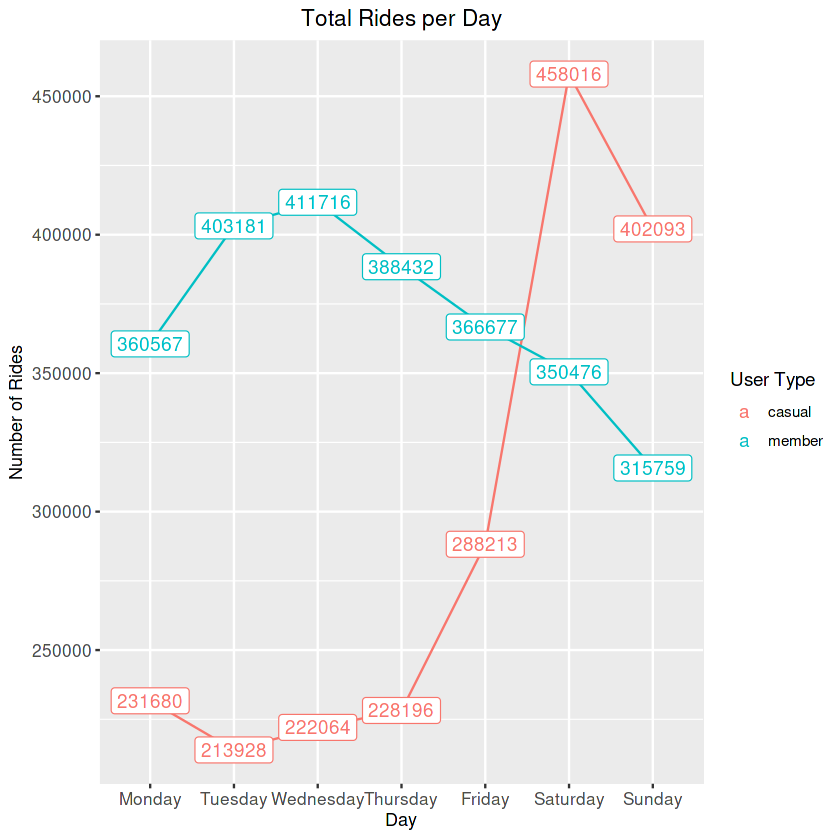

In [34]:
all_trips %>% 
  group_by(user_type, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(day_of_week ,number_of_rides, group = user_type, color = user_type)) +
  geom_line() +
  geom_point() +
  geom_label(aes(label = number_of_rides)) +
  ggtitle("Total Rides per Day") + 
  xlab("Day") + ylab("Number of Rides") + labs(color = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10))

## Visualizing the average ride duration by day

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


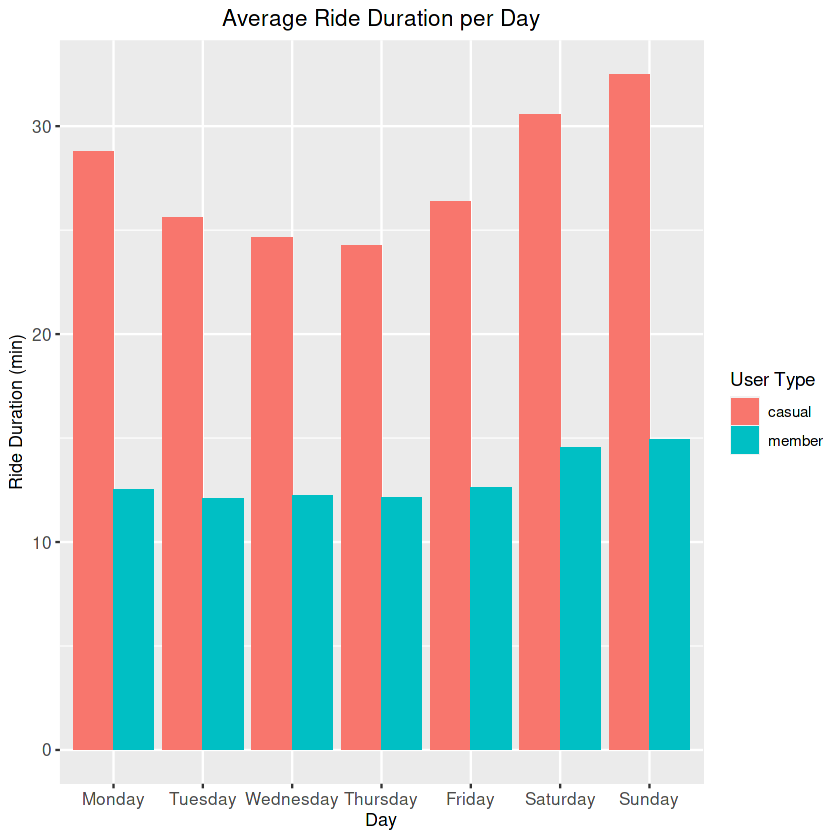

In [35]:
all_trips %>%
  group_by(user_type, day_of_week) %>% 
  summarise(average = mean(ride_length)) %>% 
  ggplot(aes(day_of_week, average, fill = user_type)) +
  ggtitle("Average Ride Duration per Day") + 
  xlab("Day") + ylab("Ride Duration (min)") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  geom_col(position = "dodge")

## Visualizing the average ride duration by month

`summarise()` has grouped output by 'user_type', 'month'. You can override
using the `.groups` argument.


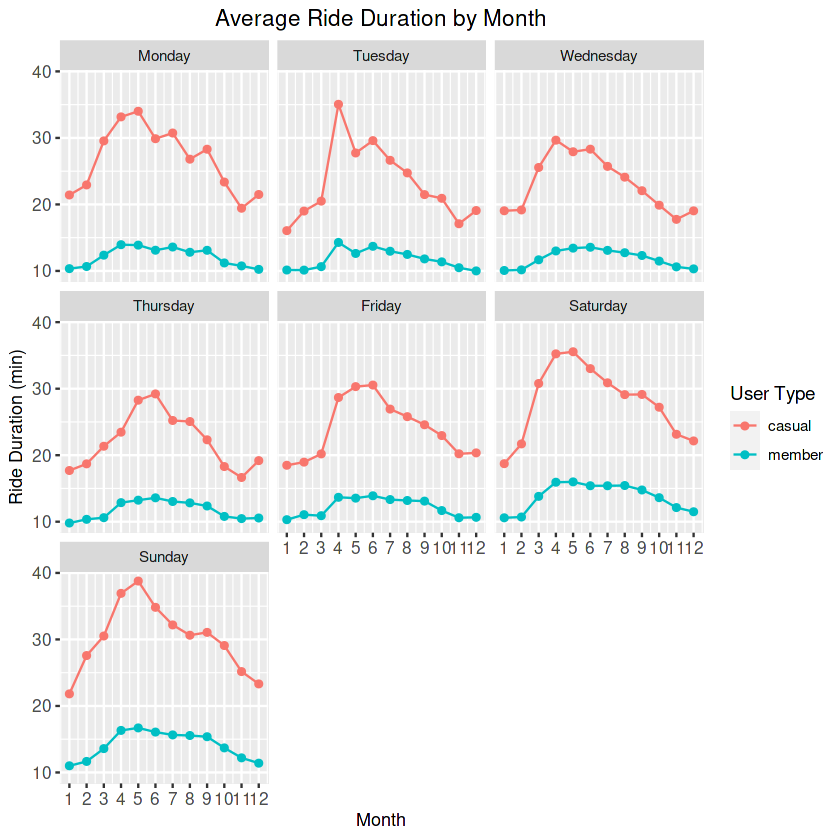

In [36]:
all_trips %>% 
  mutate(month = month(start_time)) %>% 
  group_by(user_type, month, day_of_week) %>% 
  summarise(average = mean(ride_length)) %>% 
  ggplot(aes(x = month , y = average, color = user_type)) +
  geom_line() +
  geom_point() +
  ggtitle("Average Ride Duration by Month") + 
  xlab("Month") + ylab("Ride Duration (min)") + labs(color = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  scale_x_continuous(breaks=seq(1,12,by = 1)) +
  facet_wrap(~day_of_week)

## Visualizing the total number of rides by quarter

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.


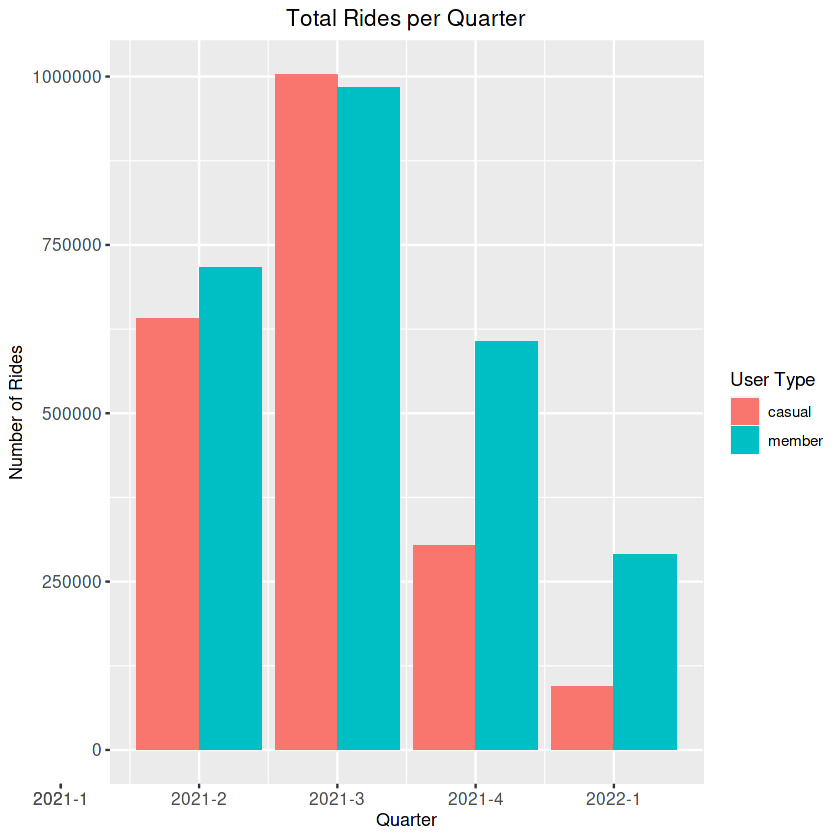

In [37]:
all_trips %>% 
  mutate(quarter = as.yearqtr((as.Date(all_trips$start_time, format = "%d/%m/%Y")))) %>% 
  group_by(user_type, quarter) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(user_type, quarter)  %>%
  ggplot(aes(x = quarter , y = number_of_rides, fill = user_type)) +
  ggtitle("Total Rides per Quarter") + 
  xlab("Quarter") + ylab("Number of Rides") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  geom_col(position = "dodge")

## Visualizing the total number of rides by user type

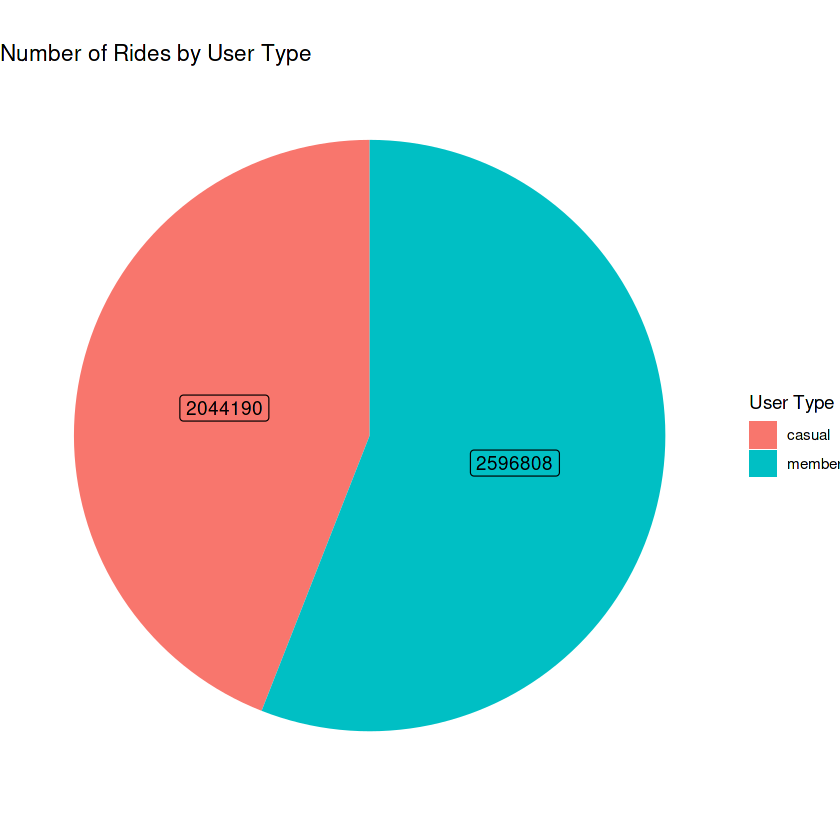

In [38]:
all_trips %>% 
  group_by(user_type) %>% 
  summarise(number_of_rides = n()) %>%
  ggplot(aes(x = "", y = number_of_rides, fill = user_type)) +
  geom_col() +
  ggtitle("Number of Rides by User Type") +
  geom_label(aes(label = number_of_rides), position = position_stack(vjust = 0.5), show.legend = FALSE) +
  coord_polar("y", start = 0) +
  xlab("") + ylab("") + labs(fill = "User Type") +
  theme_void()

## Visualizing the total number of rides by bike type

`summarise()` has grouped output by 'user_type'. You can override using the
`.groups` argument.
Warning message:
“`label_number_si()` was deprecated in scales 1.2.0.
Please use the `scale_cut` argument of `label_number()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


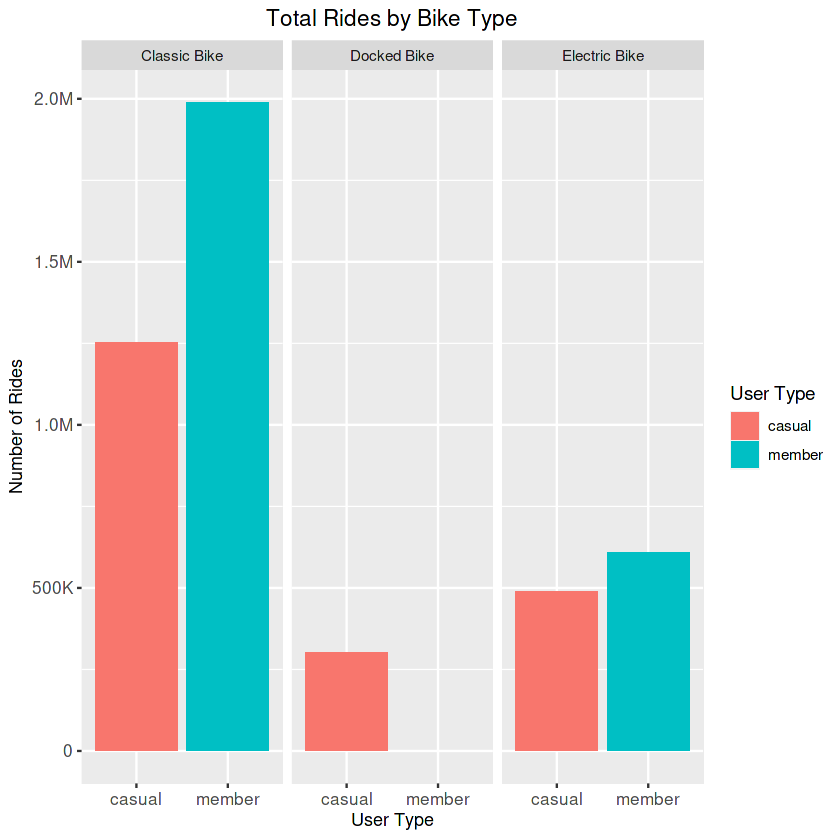

In [39]:
all_trips %>% 
  group_by(user_type, bike_type) %>% 
  summarise(number_of_rides = n()) %>% 
  ggplot(aes(x = user_type , y = number_of_rides, fill = user_type)) +
  ggtitle("Total Rides by Bike Type") + 
  xlab("User Type") + ylab("Number of Rides") + labs(fill = "User Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title = element_text(size = 10.5)) +
  theme(axis.text = element_text(size = 10)) +
  scale_y_continuous(labels = scales::label_number_si(),breaks=seq(0,2000000,by=500000)) +
  geom_col(position = "dodge") +
  facet_wrap(~bike_type)

## Visualizing the total number of rides by bike type as percentage

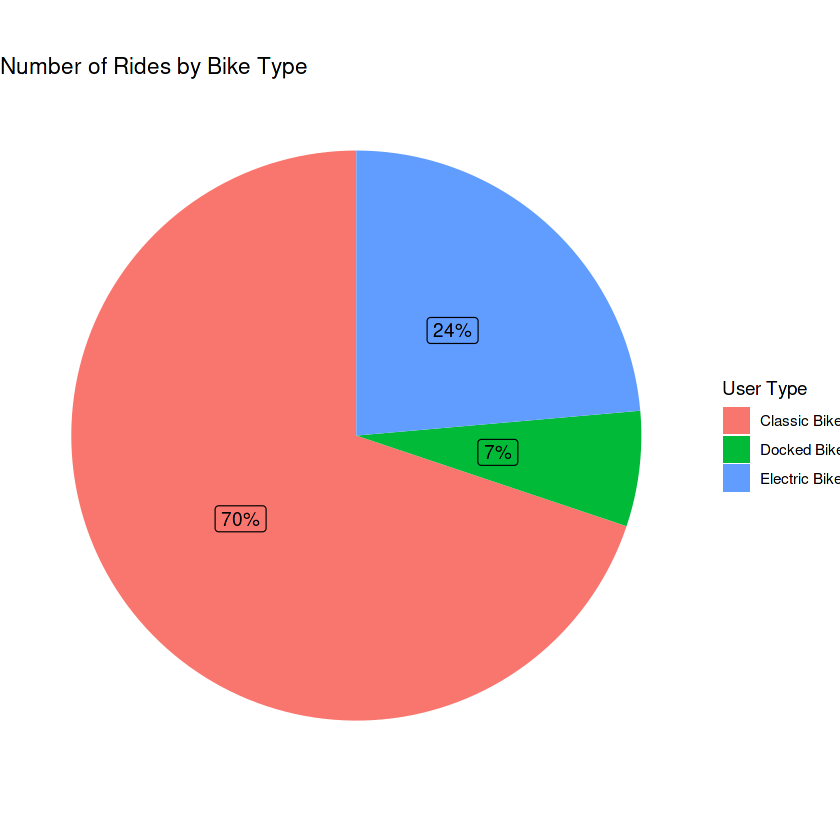

In [40]:
all_trips %>% 
  group_by(bike_type) %>% 
  summarise(number_of_rides = n()) %>%
  mutate(percentage = number_of_rides/sum(number_of_rides),
  labels = scales::percent(percentage)) %>% 
  ggplot(aes(x = "", y = percentage, fill = bike_type)) +
  geom_col() +
  ggtitle("Number of Rides by Bike Type") +
  geom_label(aes(label = labels), position = position_stack(vjust = 0.5), show.legend = FALSE) +
  coord_polar("y", start = 0) +
  xlab("") + ylab("") + labs(fill = "User Type") +
  theme_void()

## Creating the stations data frame to get the total number of rides by stations and user type

In [41]:
stations <- all_trips %>%
  gather(key, station, from_station, to_station) %>%
  group_by(station, user_type) %>%
  summarise(number_of_rides = n(), longitude = first(start_lng), latitude = first(start_lat)) %>%
  arrange(desc(number_of_rides))

`summarise()` has grouped output by 'station'. You can override using the
`.groups` argument.


## Visualizing the top 20 most visited stations by number of trips

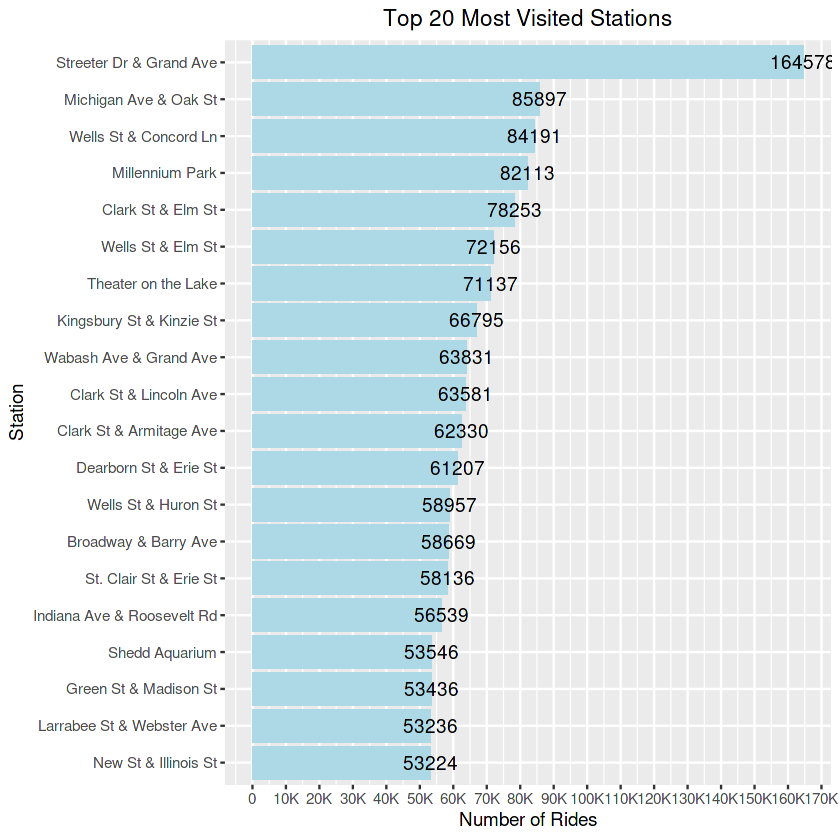

In [42]:
all_trips %>% 
  gather(key, stations, from_station, to_station) %>%
  group_by(stations) %>% 
  summarise(number_of_rides = n()) %>%
  arrange(desc(number_of_rides)) %>% 
  slice(1:20) %>%
  ggplot(aes(number_of_rides, reorder(stations, number_of_rides))) +
  scale_x_continuous(labels = scales::label_number_si(),breaks=seq(0,180000,by=10000)) +
  ggtitle("Top 20 Most Visited Stations") + 
  xlab("Number of Rides") + ylab("Station") +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_bar(stat="identity",fill="lightblue") +
  geom_text(aes(label = number_of_rides))

# Step 6: Export Summary File for Further Analysis

## Create a csv file that will be visualized in Tableau

In [43]:
write.csv(all_trips,"all_trips.csv")

write.csv(stations,"stations.csv")